## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=250, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/250
50000/50000 [==============================] - 18s 356us/step - loss: 1.8541 - acc: 0.3381 - val_loss: 1.7520 - val_acc: 0.3761
Epoch 2/250
50000/50000 [==============================] - 16s 315us/step - loss: 1.6401 - acc: 0.4169 - val_loss: 1.5875 - val_acc: 0.4287
Epoch 3/250
50000/50000 [==============================] - 16s 319us/step - loss: 1.5599 - acc: 0.4468 - val_loss: 1.5357 - val_acc: 0.4507
Epoch 4/250
50000/50000 [==============================] - 16s 315us/step - loss: 1.4932 - acc: 0.4703 - val_loss: 1.6134 - val_acc: 0.4169
Epoch 5/250
50000/50000 [==============================] - 16s 319us/step - loss: 1.4465 - acc: 0.4869 - val_loss: 1.5095 - val_acc: 0.4613
Epoch 6/250
50000/50000 [==============================] - 16s 316us/step - loss: 1.4030 - acc: 0.5028 - val_loss: 1.4863 - val_acc: 0.4687
Epoch 7/250
50000/50000 [==============================] - 16s

Epoch 57/250
50000/50000 [==============================] - 16s 316us/step - loss: 0.3225 - acc: 0.8867 - val_loss: 2.3029 - val_acc: 0.5210
Epoch 58/250
50000/50000 [==============================] - 16s 320us/step - loss: 0.3172 - acc: 0.8896 - val_loss: 2.2191 - val_acc: 0.5240
Epoch 59/250
50000/50000 [==============================] - 16s 318us/step - loss: 0.3105 - acc: 0.8902 - val_loss: 2.3689 - val_acc: 0.5122
Epoch 60/250
50000/50000 [==============================] - 16s 318us/step - loss: 0.2976 - acc: 0.8958 - val_loss: 2.3578 - val_acc: 0.5222
Epoch 61/250
50000/50000 [==============================] - 16s 319us/step - loss: 0.2847 - acc: 0.8997 - val_loss: 2.2224 - val_acc: 0.5278
Epoch 62/250
50000/50000 [==============================] - 16s 320us/step - loss: 0.2702 - acc: 0.9062 - val_loss: 2.4495 - val_acc: 0.5194
Epoch 63/250
50000/50000 [==============================] - 16s 321us/step - loss: 0.2649 - acc: 0.9080 - val_loss: 2.3215 - val_acc: 0.5292
Epoch 64/250


50000/50000 [==============================] - 9s 186us/step - loss: 0.0860 - acc: 0.9699 - val_loss: 3.4208 - val_acc: 0.5314
Epoch 116/250
50000/50000 [==============================] - 10s 195us/step - loss: 0.0841 - acc: 0.9706 - val_loss: 3.4538 - val_acc: 0.5323
Epoch 117/250
50000/50000 [==============================] - 10s 199us/step - loss: 0.0782 - acc: 0.9725 - val_loss: 3.5556 - val_acc: 0.5261
Epoch 118/250
50000/50000 [==============================] - 10s 193us/step - loss: 0.0684 - acc: 0.9764 - val_loss: 3.6191 - val_acc: 0.5305
Epoch 119/250
50000/50000 [==============================] - 10s 201us/step - loss: 0.0656 - acc: 0.9774 - val_loss: 3.4533 - val_acc: 0.5424
Epoch 120/250
50000/50000 [==============================] - 10s 194us/step - loss: 0.0554 - acc: 0.9808 - val_loss: 3.5268 - val_acc: 0.5375
Epoch 121/250
50000/50000 [==============================] - 9s 188us/step - loss: 0.0684 - acc: 0.9766 - val_loss: 3.4901 - val_acc: 0.5433
Epoch 122/250
50000/50

50000/50000 [==============================] - 9s 175us/step - loss: 4.7516e-04 - acc: 1.0000 - val_loss: 3.9640 - val_acc: 0.5576
Epoch 173/250
50000/50000 [==============================] - 9s 173us/step - loss: 4.2079e-04 - acc: 1.0000 - val_loss: 3.9740 - val_acc: 0.5571
Epoch 174/250
50000/50000 [==============================] - 9s 177us/step - loss: 3.9129e-04 - acc: 1.0000 - val_loss: 3.9831 - val_acc: 0.5580
Epoch 175/250
50000/50000 [==============================] - 9s 172us/step - loss: 3.9331e-04 - acc: 1.0000 - val_loss: 3.9835 - val_acc: 0.5582
Epoch 176/250
50000/50000 [==============================] - 9s 174us/step - loss: 3.7133e-04 - acc: 1.0000 - val_loss: 3.9921 - val_acc: 0.5584
Epoch 177/250
50000/50000 [==============================] - 9s 175us/step - loss: 3.5883e-04 - acc: 1.0000 - val_loss: 3.9972 - val_acc: 0.5586
Epoch 178/250
50000/50000 [==============================] - 9s 174us/step - loss: 3.4915e-04 - acc: 1.0000 - val_loss: 3.9972 - val_acc: 0.5581

50000/50000 [==============================] - 9s 172us/step - loss: 1.6690e-04 - acc: 1.0000 - val_loss: 4.0906 - val_acc: 0.5597
Epoch 229/250
50000/50000 [==============================] - 9s 176us/step - loss: 1.6539e-04 - acc: 1.0000 - val_loss: 4.0913 - val_acc: 0.5594
Epoch 230/250
50000/50000 [==============================] - 9s 172us/step - loss: 1.6303e-04 - acc: 1.0000 - val_loss: 4.0920 - val_acc: 0.5597
Epoch 231/250
50000/50000 [==============================] - 9s 175us/step - loss: 1.6277e-04 - acc: 1.0000 - val_loss: 4.0940 - val_acc: 0.5592
Epoch 232/250
50000/50000 [==============================] - 9s 175us/step - loss: 1.6073e-04 - acc: 1.0000 - val_loss: 4.0940 - val_acc: 0.5596
Epoch 233/250
50000/50000 [==============================] - 9s 179us/step - loss: 1.5970e-04 - acc: 1.0000 - val_loss: 4.0954 - val_acc: 0.5592
Epoch 234/250
50000/50000 [==============================] - 9s 173us/step - loss: 1.5812e-04 - acc: 1.0000 - val_loss: 4.0968 - val_acc: 0.5599

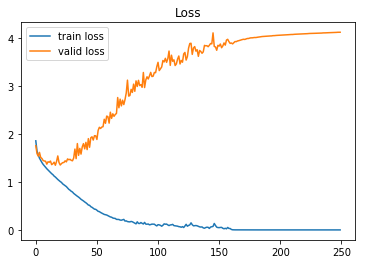

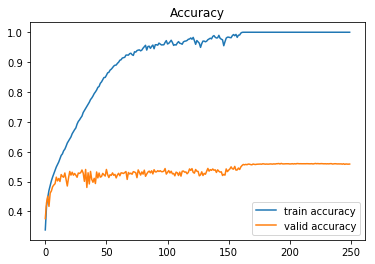

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()